# Importing Libraries

In [5]:
# pip install -U scikit-learn

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
import os
import tensorflow as tf

In [58]:
df = pd.read_csv("Datasets/final-stock-dataset-with-sentiment-polarity-subjectivity.csv")
df.head()

,Date,Open,High,Low,Qty,Turnover,economic-subjectivity,economic-polarity,political-subjectivity,political-polarity,Ltp
0,2022-06-29,318.9,318.9,310.0,310.0,6127716.2,0.457500,0.017500,0.460909,-0.122727,315.0
1,2022-06-28,312.0,316.5,306.0,306.0,5707986.7,0.195556,0.017778,0.425000,0.350000,313.0
2,2022-06-27,322.0,325.0,310.0,310.0,11125995.5,0.225000,-0.012500,0.457792,0.169481,312.0
3,2022-06-26,312.9,320.0,308.0,308.0,28577745.1,0.253704,0.038889,0.570909,0.241818,320.0
4,2022-06-24,305.0,310.0,298.2,298.2,25399389.8,0.280303,0.042424,0.300000,0.128788,307.0


In [59]:
df.tail()

,Date,Open,High,Low,Qty,Turnover,economic-subjectivity,economic-polarity,political-subjectivity,political-polarity,Ltp
943,2016-07-17,869.0,955.0,886.0,886.0,2538590.0,0.277273,0.218182,0.461818,0.004545,955.0
944,2016-07-14,790.0,869.0,805.0,805.0,151344.0,0.303030,0.090909,0.326515,-0.087879,869.0
945,2016-07-13,719.0,790.0,733.0,733.0,4231540.0,0.293182,0.337121,0.444805,-0.012987,790.0
946,2016-07-12,654.0,719.0,667.0,667.0,89570.0,0.315774,0.166369,0.343232,-0.007475,719.0
947,2016-07-11,595.0,654.0,606.0,606.0,685500.0,0.563333,0.000000,0.277381,-0.035714,654.0


In [60]:
df

,Date,Open,High,Low,Qty,Turnover,economic-subjectivity,economic-polarity,political-subjectivity,political-polarity,Ltp
0,2022-06-29,318.9,318.9,310.0,310.0,6127716.2,0.457500,0.017500,0.460909,-0.122727,315.0
1,2022-06-28,312.0,316.5,306.0,306.0,5707986.7,0.195556,0.017778,0.425000,0.350000,313.0
2,2022-06-27,322.0,325.0,310.0,310.0,11125995.5,0.225000,-0.012500,0.457792,0.169481,312.0
3,2022-06-26,312.9,320.0,308.0,308.0,28577745.1,0.253704,0.038889,0.570909,0.241818,320.0
4,2022-06-24,305.0,310.0,298.2,298.2,25399389.8,0.280303,0.042424,0.300000,0.128788,307.0
...,...,...,...,...,...,...,...,...,...,...,...
943,2016-07-17,869.0,955.0,886.0,886.0,2538590.0,0.277273,0.218182,0.461818,0.004545,955.0
944,2016-07-14,790.0,869.0,805.0,805.0,151344.0,0.303030,0.090909,0.326515,-0.087879,869.0
945,2016-07-13,719.0,790.0,733.0,733.0,4231540.0,0.293182,0.337121,0.444805,-0.012987,790.0
946,2016-07-12,654.0,719.0,667.0,667.0,89570.0,0.315774,0.166369,0.343232,-0.007475,719.0


In [61]:
df.dtypes

Date                       object
Open                      float64
High                      float64
Low                       float64
Qty                       float64
Turnover                  float64
economic-subjectivity     float64
economic-polarity         float64
political-subjectivity    float64
political-polarity        float64
Ltp                       float64
dtype: object

In [62]:
df.set_index("Date", drop=True,inplace=True)
df

,Open,High,Low,Qty,Turnover,economic-subjectivity,economic-polarity,political-subjectivity,political-polarity,Ltp
Date,,,,,,,,,,
2022-06-29,318.9,318.9,310.0,310.0,6127716.2,0.457500,0.017500,0.460909,-0.122727,315.0
2022-06-28,312.0,316.5,306.0,306.0,5707986.7,0.195556,0.017778,0.425000,0.350000,313.0
2022-06-27,322.0,325.0,310.0,310.0,11125995.5,0.225000,-0.012500,0.457792,0.169481,312.0
2022-06-26,312.9,320.0,308.0,308.0,28577745.1,0.253704,0.038889,0.570909,0.241818,320.0
2022-06-24,305.0,310.0,298.2,298.2,25399389.8,0.280303,0.042424,0.300000,0.128788,307.0
...,...,...,...,...,...,...,...,...,...,...
2016-07-17,869.0,955.0,886.0,886.0,2538590.0,0.277273,0.218182,0.461818,0.004545,955.0
2016-07-14,790.0,869.0,805.0,805.0,151344.0,0.303030,0.090909,0.326515,-0.087879,869.0
2016-07-13,719.0,790.0,733.0,733.0,4231540.0,0.293182,0.337121,0.444805,-0.012987,790.0


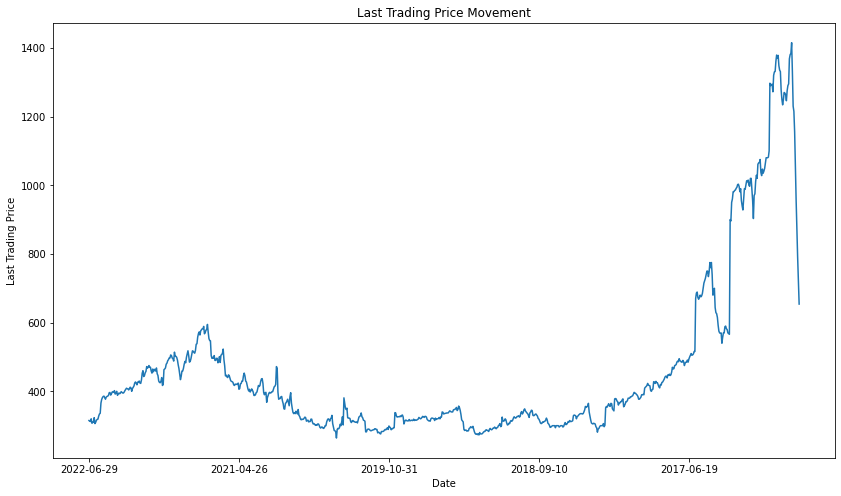

In [63]:
df['Ltp'].plot(figsize=(14,8))
plt.ylabel("Last Trading Price")
plt.title("Last Trading Price Movement")
plt.show()

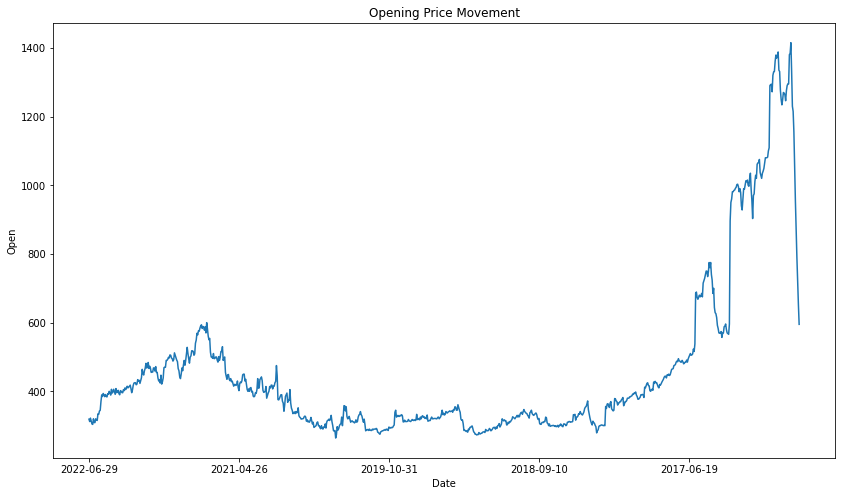

In [64]:
df['Open'].plot(figsize=(14,8))
plt.ylabel("Open")
plt.title("Opening Price Movement")
plt.show()

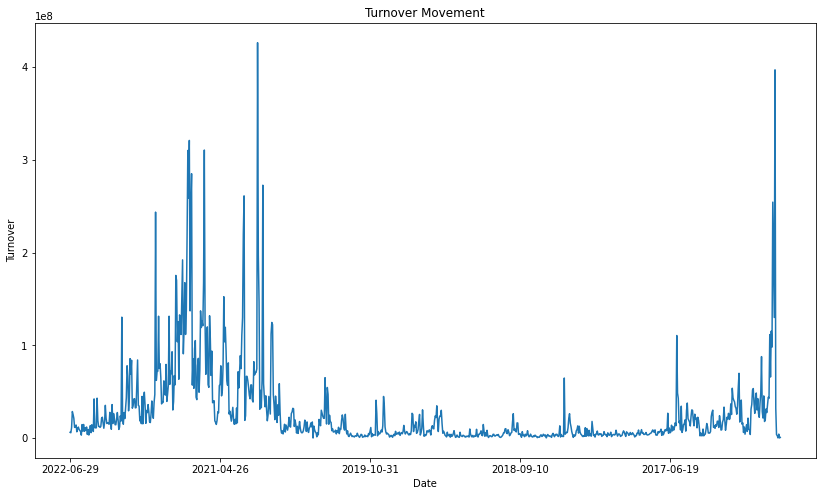

In [65]:
df['Turnover'].plot(figsize=(14,8))
plt.ylabel("Turnover")
plt.title("Turnover Movement")
plt.show()

In [68]:
data=df.filter(["Ltp"])
data

,Ltp
Date,
2022-06-29,315.0
2022-06-28,313.0
2022-06-27,312.0
2022-06-26,320.0
2022-06-24,307.0
...,...
2016-07-17,955.0
2016-07-14,869.0
2016-07-13,790.0


In [69]:
## converting data into numpy array
data = data['Ltp'].values
data = data.reshape(-1,1)
data.shape

(948, 1)

In [70]:
training = np.array(data[:int(data.shape[0]*0.8)])
testing = np.array(data[int(data.shape[0]*0.8)-50:])

In [71]:
training.shape, testing.shape

((758, 1), (240, 1))

## Data Pre-processing:

We must pre-process this data before applying stock price using LSTM. Transform the values in our data with help of the fit_transform function. Min-max scaler is used for scaling the data so that we can bring all the price values to a common scale. We then use 80 % data for training and the rest 20% for testing and assign them to separate variables.

In [72]:
scaler = MinMaxScaler(feature_range=(0,1))
train = scaler.fit_transform(training)
train[:5]

array([[0.1541717 ],
       [0.14812576],
       [0.14510278],
       [0.16928658],
       [0.12998791]])

In [73]:
test = scaler.transform(testing)
test[:5]

array([[0.30834341],
       [0.32043531],
       [0.32043531],
       [0.33555018],
       [0.34461911]])

In [80]:
def dataset(df):
  x=[]
  y=[]

  for i in range(50,df.shape[0]):
    x.append(df[i-50:i,0])
    y.append(df[i,0])

  x=np.array(x)
  y=np.array(y)

  return x,y

In [81]:
X_train, y_train = dataset(train)
X_train

array([[0.1541717 , 0.14812576, 0.14510278, ..., 0.4050786 , 0.41777509,
        0.42775091],
       [0.14812576, 0.14510278, 0.16928658, ..., 0.41777509, 0.42775091,
        0.43833132],
       [0.14510278, 0.16928658, 0.12998791, ..., 0.42775091, 0.43833132,
        0.43530834],
       ...,
       [0.32043531, 0.29020556, 0.30834341, ..., 0.42926239, 0.49576784,
        0.49274486],
       [0.29020556, 0.30834341, 0.30834341, ..., 0.49576784, 0.49274486,
        0.48065296],
       [0.30834341, 0.30834341, 0.32043531, ..., 0.49274486, 0.48065296,
        0.49879081]])

In [82]:
X_train[:1]

array([[0.1541717 , 0.14812576, 0.14510278, 0.16928658, 0.12998791,
        0.13905683, 0.13814994, 0.17926239, 0.12696493, 0.13905683,
        0.15719468, 0.16324063, 0.1662636 , 0.19347037, 0.21160822,
        0.21765417, 0.30834341, 0.34038694, 0.356711  , 0.36577993,
        0.3688029 , 0.356711  , 0.34159613, 0.35973398, 0.36577993,
        0.3691052 , 0.37484885, 0.39903265, 0.40084643, 0.37787183,
        0.38996372, 0.4050786 , 0.40810157, 0.40205562, 0.4171705 ,
        0.38694075, 0.39600967, 0.41112455, 0.37575574, 0.38694075,
        0.39600967, 0.38996372, 0.39600967, 0.40810157, 0.40205562,
        0.39600967, 0.39600967, 0.4050786 , 0.41777509, 0.42775091]])

In [83]:
X_train[:1].shape, X_train.shape

((1, 50), (708, 50))

In [84]:
X_test, y_test = dataset(test)
X_test[:1]

array([[0.30834341, 0.32043531, 0.32043531, 0.33555018, 0.34461911,
        0.27509069, 0.28415961, 0.29927449, 0.32043531, 0.32043531,
        0.32950423, 0.35066505, 0.35066505, 0.35066505, 0.36275695,
        0.36275695, 0.3688029 , 0.37182588, 0.38694075, 0.40205562,
        0.39600967, 0.3929867 , 0.38391778, 0.37787183, 0.36577993,
        0.34159613, 0.34159613, 0.35066505, 0.35973398, 0.3808948 ,
        0.3808948 , 0.38391778, 0.3808948 , 0.43833132, 0.44740024,
        0.45344619, 0.46251511, 0.48065296, 0.46553809, 0.46251511,
        0.45949214, 0.4171705 , 0.41112455, 0.42623942, 0.42926239,
        0.49576784, 0.49274486, 0.48065296, 0.49879081, 0.48669891]])

In [85]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((708, 50, 1), (190, 50, 1))

In [115]:
## Training the network
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=40))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [116]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 50, 100)           40800     
                                                                 
 dropout_9 (Dropout)         (None, 50, 100)           0         
                                                                 
 lstm_10 (LSTM)              (None, 50, 50)            30200     
                                                                 
 dropout_10 (Dropout)        (None, 50, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 40)                14560     
                                                                 
 dropout_11 (Dropout)        (None, 40)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [117]:
model.compile(optimizer='adam',loss='mse', metrics=['mse'])

In [118]:
model.fit(X_train, y_train, epochs=1000, batch_size=64,validation_split=0.1)

Epoch 1/1000
10/10 [==============================] - 14s 372ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 2/1000
10/10 [==============================] - 2s 159ms/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3/1000
10/10 [==============================] - 2s 161ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 4/1000
10/10 [==============================] - 2s 158ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 5/1000
10/10 [==============================] - 2s 157ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 6/1000
10/10 [==============================] - 2s 155ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 7/1000
10/10 [==============================] - 2s 164ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 8/1000
10/10 [==============================] - 2s 169m

Epoch 62/1000
10/10 [==============================] - 2s 160ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 63/1000
10/10 [==============================] - 2s 164ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 64/1000
10/10 [==============================] - 2s 164ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 65/1000
10/10 [==============================] - 2s 169ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 66/1000
10/10 [==============================] - 2s 163ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 67/1000
10/10 [==============================] - 2s 164ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 68/1000
10/10 [==============================] - 2s 157ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 69/1000
10/10 [==============================] - 

10/10 [==============================] - 2s 159ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 123/1000
10/10 [==============================] - 2s 166ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 124/1000
10/10 [==============================] - 2s 158ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 125/1000
10/10 [==============================] - 2s 162ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 126/1000
10/10 [==============================] - 2s 155ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 127/1000
10/10 [==============================] - 2s 169ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 128/1000
10/10 [==============================] - 2s 165ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 129/1000
10/10 [==============================] - 1s 149m

10/10 [==============================] - 1s 154ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 183/1000
10/10 [==============================] - 2s 157ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 184/1000
10/10 [==============================] - 1s 149ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 185/1000
10/10 [==============================] - 2s 156ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 186/1000
10/10 [==============================] - 2s 158ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 187/1000
10/10 [==============================] - 2s 162ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 188/1000
10/10 [==============================] - 2s 162ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 189/1000
10/10 [==============================] - 2s 155m

10/10 [==============================] - 2s 157ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 9.5479e-04 - val_mse: 9.5479e-04
Epoch 243/1000
10/10 [==============================] - 2s 158ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 244/1000
10/10 [==============================] - 2s 162ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 245/1000
10/10 [==============================] - 2s 168ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 246/1000
10/10 [==============================] - 2s 165ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 9.1618e-04 - val_mse: 9.1618e-04
Epoch 247/1000
10/10 [==============================] - 2s 167ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 9.8919e-04 - val_mse: 9.8919e-04
Epoch 248/1000
10/10 [==============================] - 2s 159ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 9.9512e-04 - val_mse: 9.9512e-04
Epoch 249/1000
10/10 [=========

10/10 [==============================] - 1s 146ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 302/1000
10/10 [==============================] - 2s 166ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 303/1000
10/10 [==============================] - 2s 168ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 304/1000
10/10 [==============================] - 2s 170ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 305/1000
10/10 [==============================] - 2s 163ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 306/1000
10/10 [==============================] - 2s 152ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 9.9904e-04 - val_mse: 9.9904e-04
Epoch 307/1000
10/10 [==============================] - 2s 156ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 8.8683e-04 - val_mse: 8.8683e-04
Epoch 308/1000
10/10 [=========================

10/10 [==============================] - 1s 148ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 361/1000
10/10 [==============================] - 2s 152ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 362/1000
10/10 [==============================] - 1s 149ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 363/1000
10/10 [==============================] - 1s 149ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 9.7955e-04 - val_mse: 9.7955e-04
Epoch 364/1000
10/10 [==============================] - 1s 144ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 365/1000
10/10 [==============================] - 2s 168ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 366/1000
10/10 [==============================] - 2s 171ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 367/1000
10/10 [==============================] -

10/10 [==============================] - 1s 149ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 419/1000
10/10 [==============================] - 1s 145ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 420/1000
10/10 [==============================] - 2s 154ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 9.1573e-04 - val_mse: 9.1573e-04
Epoch 421/1000
10/10 [==============================] - 2s 150ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 9.3720e-04 - val_mse: 9.3720e-04
Epoch 422/1000
10/10 [==============================] - 2s 158ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 9.5872e-04 - val_mse: 9.5872e-04
Epoch 423/1000
10/10 [==============================] - 2s 160ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 424/1000
10/10 [==============================] - 2s 156ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 425/1000
10/10 [=================

10/10 [==============================] - 2s 162ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 9.8697e-04 - val_mse: 9.8697e-04
Epoch 478/1000
10/10 [==============================] - 2s 158ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 9.5709e-04 - val_mse: 9.5709e-04
Epoch 479/1000
10/10 [==============================] - 2s 160ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 9.5825e-04 - val_mse: 9.5825e-04
Epoch 480/1000
10/10 [==============================] - 2s 154ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 481/1000
10/10 [==============================] - 2s 150ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 482/1000
10/10 [==============================] - 2s 166ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 483/1000
10/10 [==============================] - 1s 146ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 9.9737e-04 - val_mse: 9.9737e-04
Epoch 484/1000
10/10 [=========

Epoch 536/1000
10/10 [==============================] - 2s 153ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 9.7771e-04 - val_mse: 9.7771e-04
Epoch 537/1000
10/10 [==============================] - 2s 158ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 9.8662e-04 - val_mse: 9.8662e-04
Epoch 538/1000
10/10 [==============================] - 2s 164ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 539/1000
10/10 [==============================] - 2s 159ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 9.6950e-04 - val_mse: 9.6950e-04
Epoch 540/1000
10/10 [==============================] - 2s 161ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 541/1000
10/10 [==============================] - 2s 160ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 9.6867e-04 - val_mse: 9.6867e-04
Epoch 542/1000
10/10 [==============================] - 2s 154ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 8.8341e-04 - val_mse: 8.8341e-04
Epoch 54

Epoch 595/1000
10/10 [==============================] - 2s 160ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 596/1000
10/10 [==============================] - 2s 154ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 597/1000
10/10 [==============================] - 1s 142ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 598/1000
10/10 [==============================] - 1s 149ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 599/1000
10/10 [==============================] - 2s 156ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 600/1000
10/10 [==============================] - 1s 126ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 601/1000
10/10 [==============================] - 2s 154ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 602/1000
10/10 [==========================

10/10 [==============================] - 1s 146ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 9.2718e-04 - val_mse: 9.2718e-04
Epoch 655/1000
10/10 [==============================] - 1s 143ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 9.2513e-04 - val_mse: 9.2513e-04
Epoch 656/1000
10/10 [==============================] - 2s 161ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 657/1000
10/10 [==============================] - 2s 149ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 658/1000
10/10 [==============================] - 2s 163ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 659/1000
10/10 [==============================] - 2s 164ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 660/1000
10/10 [==============================] - 2s 164ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 661/1000
10/10 [=========================

Epoch 713/1000
10/10 [==============================] - 1s 144ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 714/1000
10/10 [==============================] - 2s 234ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 715/1000
10/10 [==============================] - 2s 192ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 716/1000
10/10 [==============================] - 3s 282ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 717/1000
10/10 [==============================] - 3s 275ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 718/1000
10/10 [==============================] - 3s 333ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 719/1000
10/10 [==============================] - 3s 263ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 720/1000
10/10 [==========================

10/10 [==============================] - 1s 148ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 773/1000
10/10 [==============================] - 1s 146ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 774/1000
10/10 [==============================] - 1s 150ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 775/1000
10/10 [==============================] - 1s 133ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 9.3786e-04 - val_mse: 9.3786e-04
Epoch 776/1000
10/10 [==============================] - 1s 148ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 9.6526e-04 - val_mse: 9.6526e-04
Epoch 777/1000
10/10 [==============================] - 1s 145ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 778/1000
10/10 [==============================] - 1s 147ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 779/1000
10/10 [=========================

10/10 [==============================] - 3s 269ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 832/1000
10/10 [==============================] - 3s 298ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 9.4894e-04 - val_mse: 9.4894e-04
Epoch 833/1000
10/10 [==============================] - 3s 323ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 9.3191e-04 - val_mse: 9.3191e-04
Epoch 834/1000
10/10 [==============================] - 3s 323ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 835/1000
10/10 [==============================] - 3s 316ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 836/1000
10/10 [==============================] - 3s 298ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 837/1000
10/10 [==============================] - 3s 311ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 838/1000
10/10 [=========================

10/10 [==============================] - 1s 93ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 891/1000
10/10 [==============================] - 1s 68ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 9.7154e-04 - val_mse: 9.7154e-04
Epoch 892/1000
10/10 [==============================] - 1s 73ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 893/1000
10/10 [==============================] - 1s 79ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 9.9388e-04 - val_mse: 9.9388e-04
Epoch 894/1000
10/10 [==============================] - 1s 68ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 895/1000
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 896/1000
10/10 [==============================] - 1s 71ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 897/1000
10/10 [==============================] 

Epoch 950/1000
10/10 [==============================] - 1s 86ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 951/1000
10/10 [==============================] - 1s 83ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 952/1000
10/10 [==============================] - 1s 78ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 953/1000
10/10 [==============================] - 1s 70ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 954/1000
10/10 [==============================] - 1s 71ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 955/1000
10/10 [==============================] - 1s 70ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 956/1000
10/10 [==============================] - 1s 73ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 9.3820e-04 - val_mse: 9.3820e-04
Epoch 957/1000
10/10 [=========================

In [119]:
## make predictions
predictions = model.predict(X_test)
predictions

array([[ 0.5016649 ],
       [ 0.5072391 ],
       [ 0.4839023 ],
       [ 0.47413835],
       [ 0.46246022],
       [ 0.4989745 ],
       [ 0.47325486],
       [ 0.519876  ],
       [ 0.49468192],
       [ 0.534538  ],
       [ 0.52552265],
       [ 0.56453633],
       [ 0.5555253 ],
       [ 0.5726493 ],
       [ 0.5444994 ],
       [ 0.59161806],
       [ 0.55979955],
       [ 0.596987  ],
       [ 0.55740273],
       [ 0.59077084],
       [ 0.5979742 ],
       [ 0.6540395 ],
       [ 0.6111163 ],
       [ 0.64675367],
       [ 0.6577115 ],
       [ 0.6741016 ],
       [ 0.67831993],
       [ 0.7059584 ],
       [ 0.70922995],
       [ 0.7107636 ],
       [ 0.739835  ],
       [ 0.7129334 ],
       [ 0.72494555],
       [ 0.7057383 ],
       [ 0.71674764],
       [ 0.7248922 ],
       [ 0.71553755],
       [ 0.6818879 ],
       [ 0.70632863],
       [ 0.7047491 ],
       [ 0.71545845],
       [ 0.7276739 ],
       [ 0.70957047],
       [ 0.74314904],
       [ 0.74848557],
       [ 0

In [120]:
predictions = scaler.inverse_transform(predictions)
predictions

array([[429.95074],
       [431.7947 ],
       [424.0749 ],
       [420.84497],
       [416.9818 ],
       [429.06076],
       [420.5527 ],
       [435.97498],
       [427.6408 ],
       [440.82513],
       [437.84286],
       [450.74863],
       [447.76776],
       [453.43237],
       [444.1204 ],
       [459.70724],
       [449.1817 ],
       [461.4833 ],
       [448.38882],
       [459.427  ],
       [461.80988],
       [480.35626],
       [466.15726],
       [477.9461 ],
       [481.57098],
       [486.9928 ],
       [488.38824],
       [497.53104],
       [498.61328],
       [499.1206 ],
       [508.73743],
       [499.83838],
       [503.81198],
       [497.45822],
       [501.10013],
       [503.7943 ],
       [500.69983],
       [489.5685 ],
       [497.6535 ],
       [497.131  ],
       [500.67365],
       [504.71454],
       [498.7259 ],
       [509.8337 ],
       [511.59903],
       [520.7479 ],
       [522.7913 ],
       [520.4427 ],
       [522.195  ],
       [524.84894],


In [121]:
len(y_train), len(predictions)

(708, 190)

range(758, 948)


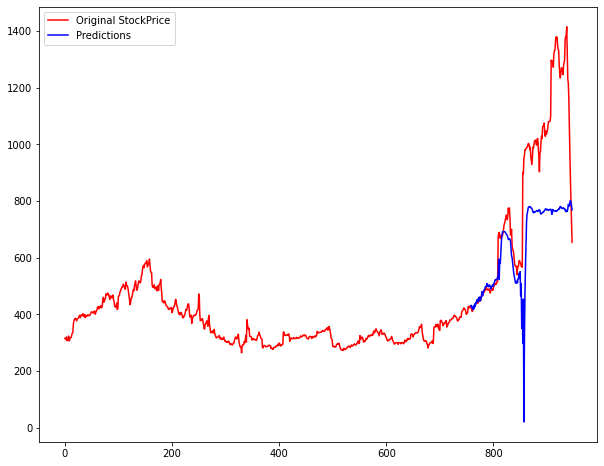

In [122]:
## visualize
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(data, color='red', label='Original StockPrice')
ax.plot(range(len(y_train)+50, len(y_train)+50+len(predictions)),predictions, color='blue', label='Predictions')
plt.legend()
print(range(len(y_train)+50, len(y_train)+50+len(predictions)))

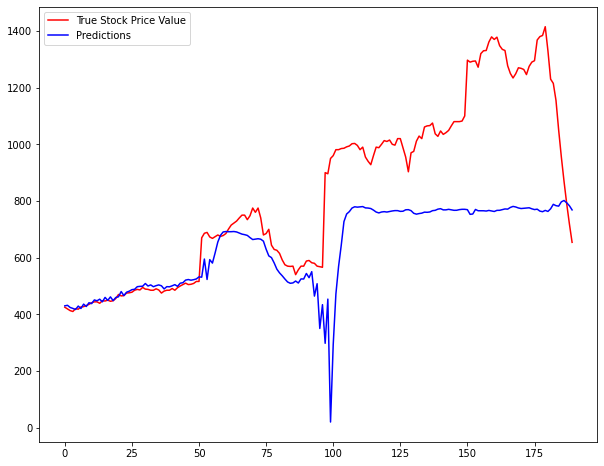

In [123]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))

## visualize
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(y_test_scaled, color='red', label='True Stock Price Value')
ax.plot(predictions, color='blue', label='Predictions')
plt.legend();